In [1]:
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn import linear_model
from sklearn import preprocessing

# Forecasting
#from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Visualizations
import seaborn as sns
from matplotlib import pyplot as plt

# Evaluation metrics
from sklearn import metrics

In [36]:
df = pd.read_csv('data_prueba_Forecasting.csv', parse_dates=['id_fec_diaria'])
print(df.shape)

(426377, 10)


### First step: Drop the column 0

In [37]:
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')
#df = df[df.columns[1:]]
df['Venta_total'] = venta_total = df.Venta * df.Precio
df['Venta_total_aa'] = venta_total_aa = df.Venta_aa * df.Precio_aa
df.head()

,Unnamed: 0,Formato,Subformato,Tienda,Producto,id_fec_diaria,Venta,Precio,Venta_aa,Precio_aa,Venta_total,Venta_total_aa
0,0,Super,Basico,1,369772,2021-08-01,7.0,17.168571,5.0,21.063200,120.179996,105.315998
1,1,Super,Basico,1,369772,2021-08-02,6.0,17.141667,3.0,21.388667,102.850002,64.166000
2,2,Super,Basico,1,369772,2021-08-03,5.0,17.136000,5.0,21.376199,85.680000,106.880997
3,3,Super,Basico,1,369772,2021-08-04,4.0,16.995000,3.0,21.360367,67.980001,64.081100
4,4,Super,Basico,1,369772,2021-08-05,1.0,17.240000,1.0,21.397100,17.240000,21.397100


sum and proportion of formats

In [38]:
df[['Formato', 'Subformato']].value_counts()

Formato  Subformato
Hiper    Basico        146838
         Intermedio    109929
         Plus           67218
Super    Intermedio     43367
         Plus           35379
         Basico         23646
dtype: int64

Number of total products in the sails

In [39]:
df['Producto'].unique().shape[0]

2405

In [46]:
df[df['Producto'] == 116]['Venta_total'].sum()

39173178.65184641

Top 5 anual sails by product 2021

In [44]:
df.groupby(df['Producto'])[['Venta_total']].sum().sort_values(by='Venta_total', ascending=False).head(5)

,Venta_total
Producto,
116,3.917318e+07
480,3.787985e+07
407,2.444622e+07
456,2.320861e+07
1399234,1.990996e+07


Top 5 anual sails by product 2020

In [45]:
df.groupby(df['Producto'])[['Venta_total_aa']].sum().sort_values(by='Venta_total_aa', ascending=False).head(5)

,Venta_total_aa
Producto,
116,3.517512e+07
480,3.372527e+07
407,2.558356e+07
456,2.080189e+07
1399234,2.012884e+07


Text(10, -30, 'End-of-season summer sales')

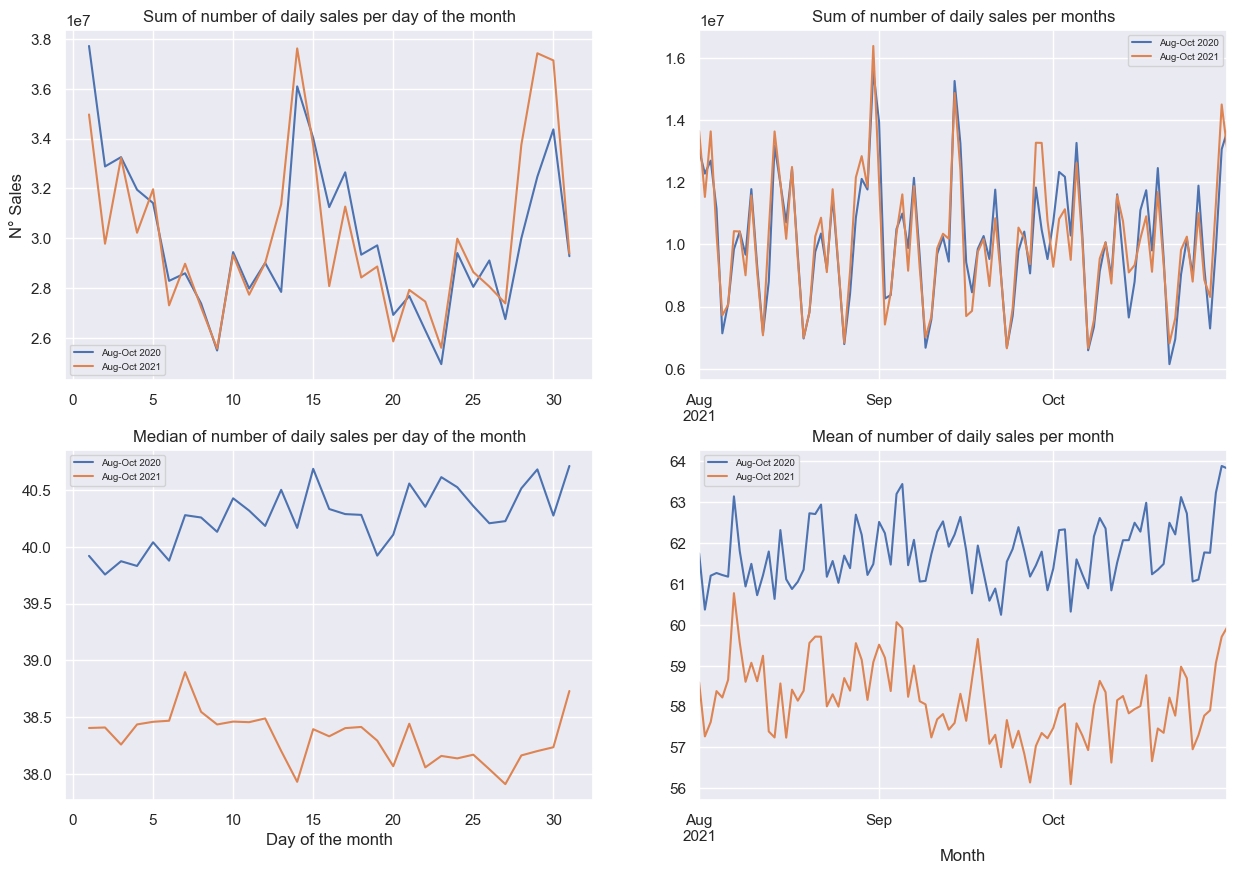

In [50]:
sns.set(rc={'figure.figsize':(15, 10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
df.groupby(df['id_fec_diaria'].dt.day).sum()['Venta_total'].plot(ax=ax1, xlabel='') # TS for 2021
df.groupby(df['id_fec_diaria'].dt.day).sum()['Venta_total_aa'].plot(ax=ax1, xlabel='') # TS for 2020
ax1.legend(['Aug-Oct 2020', 'Aug-Oct 2021'], fontsize=7)
ax1.title.set_text('Sum of number of daily sales per day of the month')
ax1.set_ylabel('N° Sales')
ax1.annotate("Fortnight", xy=(14, 1275000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(15, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))
ax1.annotate("Fortnight", xy=(29, 1275000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))

df.groupby(df['id_fec_diaria']).sum()['Venta_total'].plot(ax=ax2, xlabel='') # TS for 2021
df.groupby(df['id_fec_diaria']).sum()['Venta_total_aa'].plot(ax=ax2, xlabel='') # TS for 2020
ax2.title.set_text('Sum of number of daily sales per months')
ax2.legend(['Aug-Oct 2020', 'Aug-Oct 2021'], fontsize=7)
ax2.annotate("End-of-season summer sales", xy=('2021-08-31', 625000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))

df.groupby(df['id_fec_diaria'].dt.day).median()['Precio'].plot(ax=ax3, xlabel='') # TS for 2021
df.groupby(df['id_fec_diaria'].dt.day).median()['Precio_aa'].plot(ax=ax3, xlabel='') # TS for 2020
ax3.legend(['Aug-Oct 2020', 'Aug-Oct 2021'], fontsize=7)
ax3.title.set_text('Median of number of daily sales per day of the month')
ax3.set_xlabel('Day of the month')
ax3.annotate("Fortnight", xy=(14, 1275000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(15, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))
ax3.annotate("Fortnight", xy=(29, 1275000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))

df.groupby(df['id_fec_diaria']).mean()['Precio'].plot(ax=ax4, xlabel='') # TS for 2021
df.groupby(df['id_fec_diaria']).mean()['Precio_aa'].plot(ax=ax4, xlabel='') # TS for 2020
ax4.title.set_text('Mean of number of daily sales per month')
ax4.set_xlabel('Month')
ax4.legend(['Aug-Oct 2020', 'Aug-Oct 2021'], fontsize=7)
ax4.annotate("End-of-season summer sales", xy=('2021-08-31', 625000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))

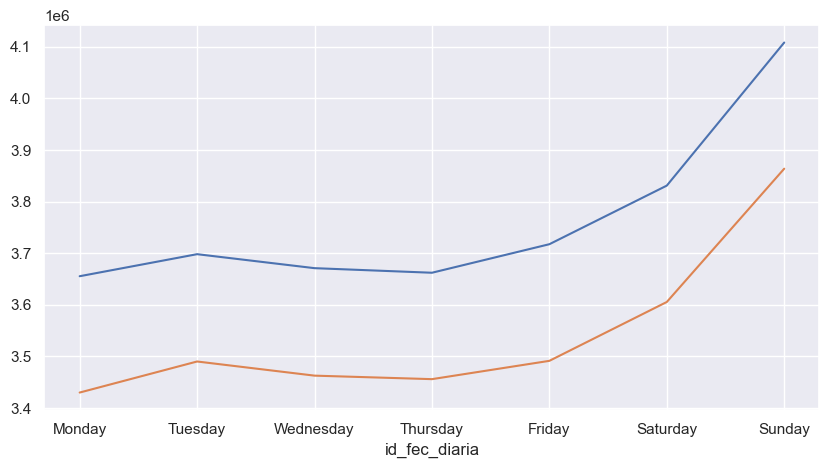

In [54]:
sns.set(rc={'figure.figsize':(10, 5)})
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(df['id_fec_diaria'].dt.day_name()).sum().reindex(cats)['Precio'].plot()
df.groupby(df['id_fec_diaria'].dt.day_name()).sum().reindex(cats)['Precio_aa'].plot()
plt.show()

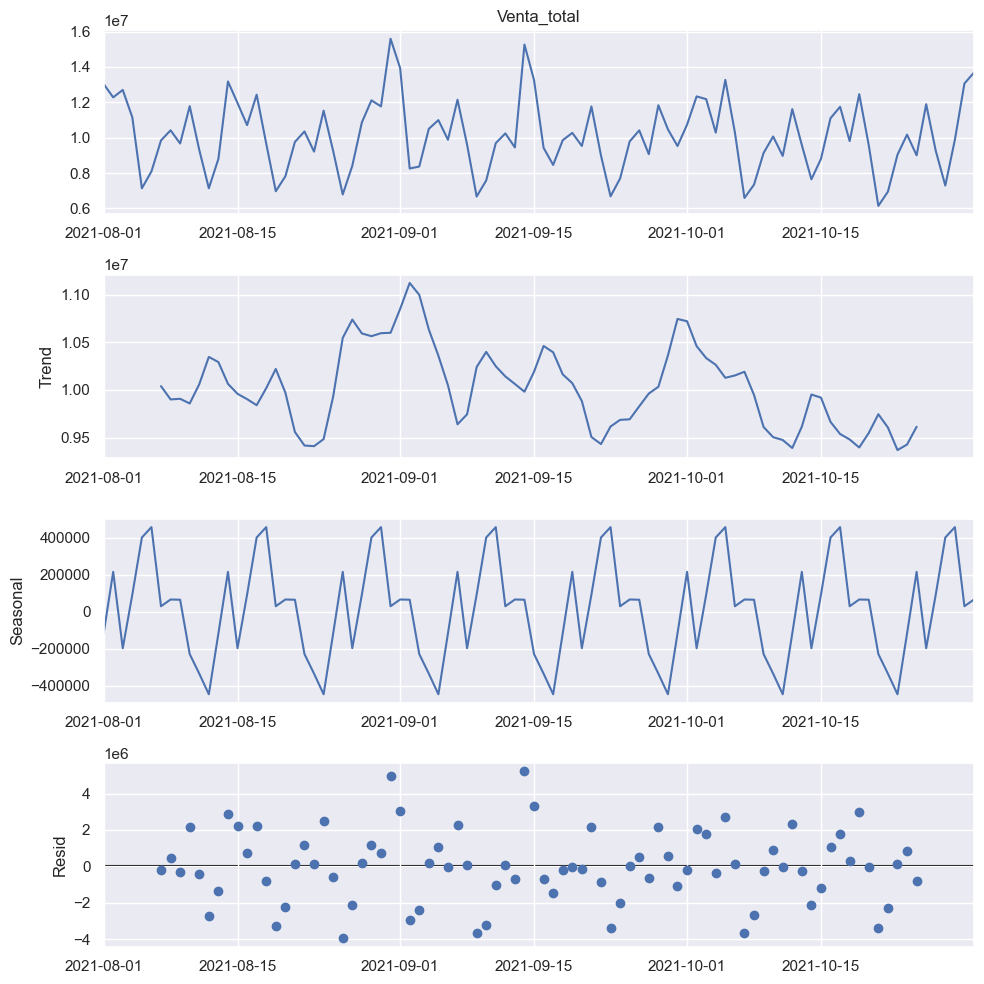

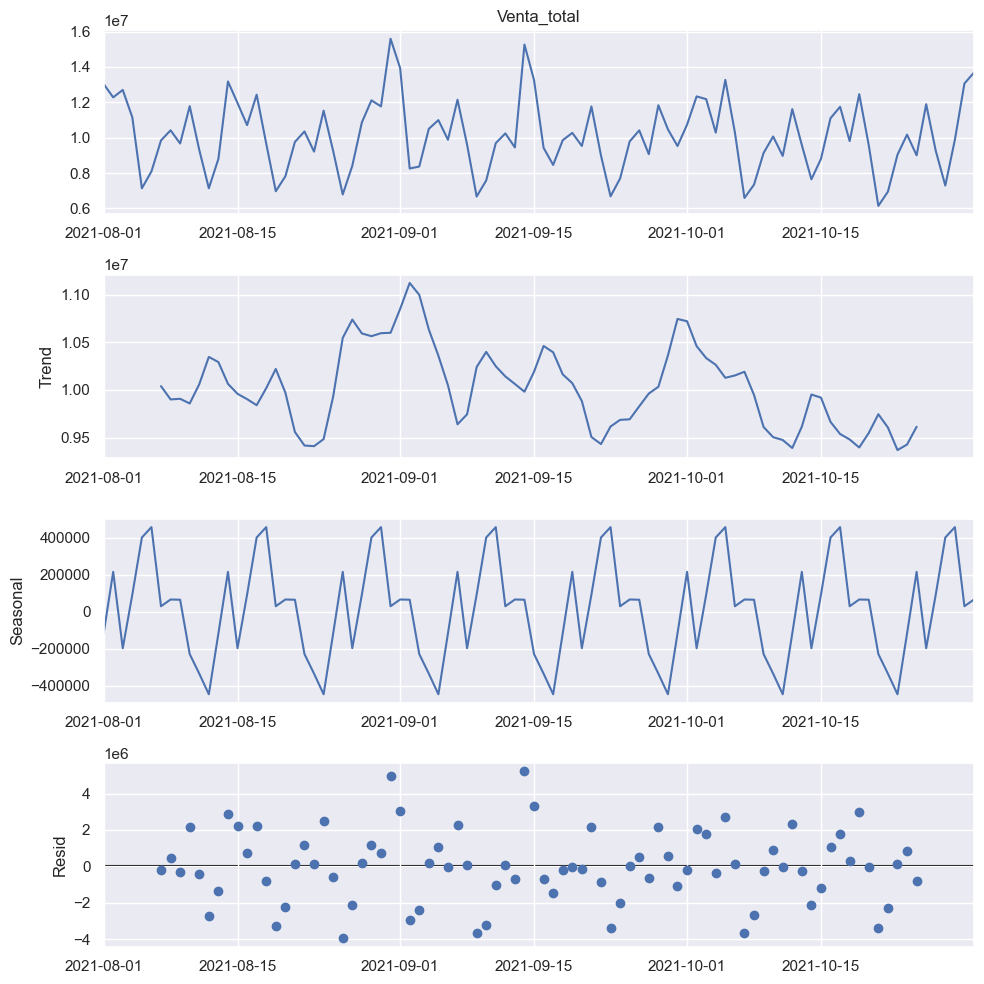

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(rc={'figure.figsize':(10, 10)})
df_ts = df.groupby(df['id_fec_diaria']).sum()
result = seasonal_decompose(df_ts['Venta_total'], model='linear', period=12)
result.plot()

#### In the next cell we can observe that the location and vairability of the diferent periods of time during 2020 and 2021 are very similar.

# Preprocessing

In [57]:
df_ts = df.groupby(df['id_fec_diaria']).sum()
total20 = []
total21 = []
for i in df_ts.reset_index()['id_fec_diaria']:
    t20, t21 = 0, 0
    for j, row in df[df['id_fec_diaria'] == i].iterrows():
        t20 += (row.Venta * row.Precio)
        t21 += (row.Venta_aa * row.Precio)
    total20.append(t20)
    total21.append(t21)
len(total20), len(total21)

(92, 92)

In [101]:
# Creating new index for 2020
df_ts = df.groupby(df['id_fec_diaria']).sum()
df_ts.reset_index(inplace=True)

index_2020 = []
index_2021 = []
c = -92
for i, row in df_ts.iterrows():
    index_2020.append(c)
    index_2021.append(int(df[df['id_fec_diaria'] == row['id_fec_diaria']]['Unnamed: 0'].unique()))
    c += 1
df_ts['day_2020'] = index_2020
df_ts['day_2021'] = index_2021

df_2020 = df_ts[['Venta_total_aa', 'Venta_aa', 'Precio_aa', 'id_fec_diaria', 'day_2020']]
df_2020.rename(columns={'Venta_total_aa': 'Venta_total', 'Venta_aa': 'Venta', 'Precio_aa': 'Precio', 'day_2020': 'day'}, inplace=True)
df_2020['total'] = total20
df_2021 = df_ts[['Venta_total', 'Venta', 'Precio', 'id_fec_diaria', 'day_2021']]
df_2021.rename(columns={'day_2021': 'day'}, inplace=True)
df_2021['total'] = total21
df_ts = pd.concat([df_2021, df_2020]).set_index('day')
df_ts.sort_index(ascending=True, inplace=True)

C:\Users\fagui\AppData\Local\Temp\ipykernel_10096\509054273.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.rename(columns={'Venta_total_aa': 'Venta_total', 'Venta_aa': 'Venta', 'Precio_aa': 'Precio', 'day_2020': 'day'}, inplace=True)
C:\Users\fagui\AppData\Local\Temp\ipykernel_10096\509054273.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['total'] = total20
C:\Users\fagui\AppData\Local\Temp\ipykernel_10096\509054273.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

What is the most sold period? 933107553.3 sales in 2020


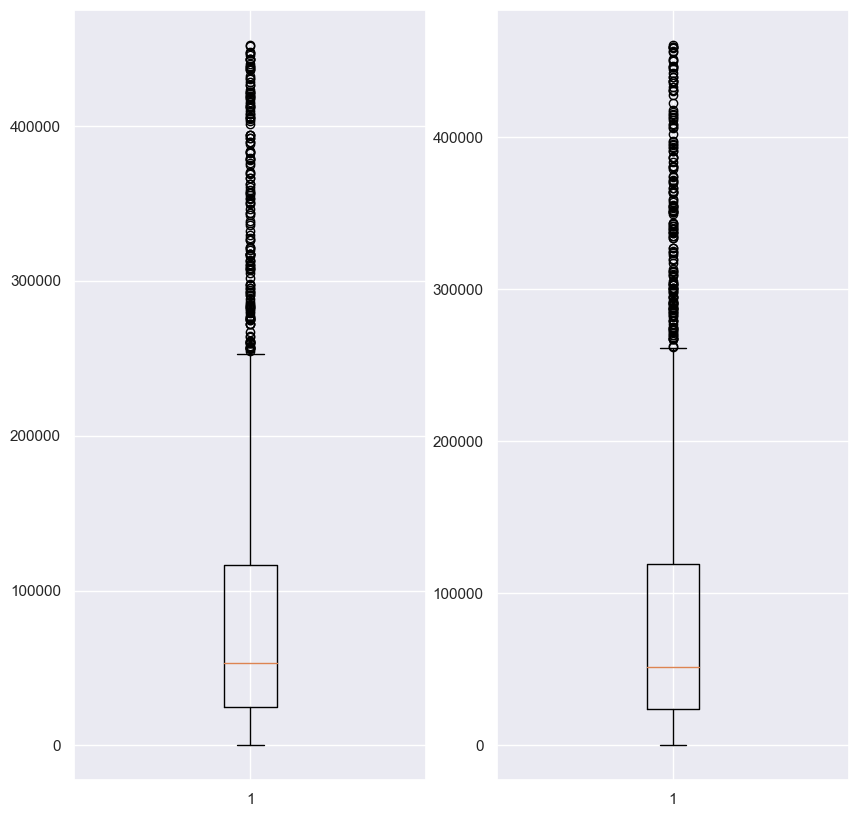

In [102]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, (ax1, ax2) = plt.subplots(1, 2)
df_vprod = df.groupby(df['Producto'])['Venta_total'].sum().sort_values(ascending=False)
df_vprod_aa = df.groupby(df['Producto'])['Venta_total_aa'].sum().sort_values(ascending=False)
ax1.boxplot(df_f2020)
ax2.boxplot(df_f2021)
print("What is the most sold period? {} sales in 2020".format(round(df_vprod_aa.sum(), 2)))

In [103]:
def get_order_statistics(s):
    print(f'Valor mínimo: {s.min()}')
    print(f'Percentil 10: {s.quantile(0.1)}')
    print(f'Percentil 25: {s.quantile(0.25)}')
    print(f'Percentil 50: {s.median()}')
    print(f'Percentil 75: {s.quantile(0.75)}')
    print(f'Percentil 90: {s.quantile(0.9)}')
    print(f'Valor máximo: {s.max()}')
    
print(get_order_statistics(df_vprod))
print(get_order_statistics(df_vprod_aa))

Valor mínimo: 409.27999114990234
Percentil 10: 14157.768671690623
Percentil 25: 28487.699860095978
Percentil 50: 68048.02484628132
Percentil 75: 198147.97048187256
Percentil 90: 707542.3525833278
Valor máximo: 39173178.65184641
None
Valor mínimo: 99.29299926757812
Percentil 10: 13617.013481140137
Percentil 25: 27386.27359008789
Percentil 50: 66643.09132766724
Percentil 75: 200757.15889811516
Percentil 90: 685702.6436073302
Valor máximo: 35175117.15461159
None


### Periods from August 1st to October 14th from both years for training and the last days for train.

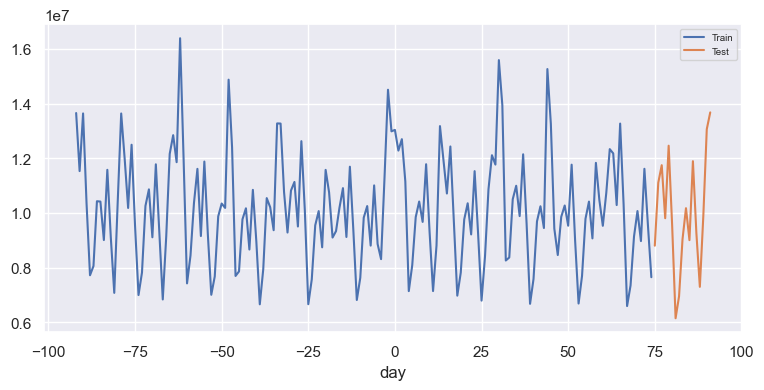

In [104]:
days = 17
df_train = df_ts.iloc[:-days]
df_test = df_ts.iloc[-days:]

fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta_total'].plot(ax=ax, label='train')
df_test['Venta_total'].plot(ax=ax, label='test')
ax.legend(['Train', 'Test'], fontsize=7)

In [105]:
x_train = df_train[['Precio', 'total', 'Venta']].to_numpy()#.reshape(-1, 1)
y_train = df_train['Venta_total'].to_numpy().reshape(-1, 1)

x_test = df_test[['Precio', 'total', 'Venta']].to_numpy()#.reshape(-1, 1)
y_test = df_test['Venta_total'].to_numpy().reshape(-1, 1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(167, 3) (167, 1) (17, 3) (17, 1)


In [106]:
# Uncomment if your want recover the first test

#x_train = df_train[['Precio']].to_numpy().reshape(-1, 1)
#y_train = df_train['Venta'].to_numpy().reshape(-1, 1)

#x_test = df_test[['Precio']].to_numpy().reshape(-1, 1)
#y_test = df_test['Venta'].to_numpy().reshape(-1, 1)
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [118]:
x_train[0]

array([  274332.55569022, 13039323.15110721,   456860.16205628])

df_tsnear Regression

In [116]:
reg = LinearRegression().fit(x_train[0], y_train[0])
y_pred = reg.predict(x_test)

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_pred[:5], y_test[:5])
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()

ValueError: Expected 2D array, got 1D array instead:
array=[  274332.55569022 13039323.15110721   456860.16205628].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Polinomial Regression

230432.15636263683
90009181310.76617
300015.3017943688


C:\Users\fagui\AppData\Local\Temp\ipykernel_10096\1932252520.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = y_pred


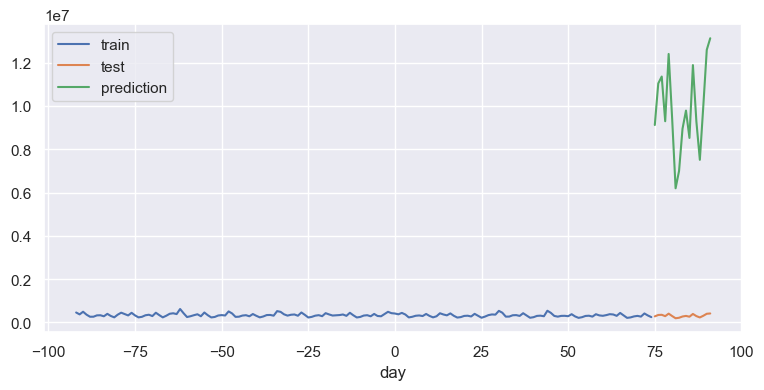

In [109]:
n = 2
model = Pipeline([('poly', PolynomialFeatures(degree=n, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
y_pred[:5], y_test[:5]
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()

## Ridge regression

366338.9486724427
168719714121.3342
410755.05367716926
[[ 9274904.97614065]
 [10849124.58510351]
 [11236002.32274769]
 [ 9261758.48355502]
 [12246642.64991309]] [[ 8802225.82671166]
 [11105497.04075914]
 [11747886.62014294]
 [ 9807520.50855103]
 [12461298.57636038]]


C:\Users\fagui\AppData\Local\Temp\ipykernel_10096\812625831.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = y_pred


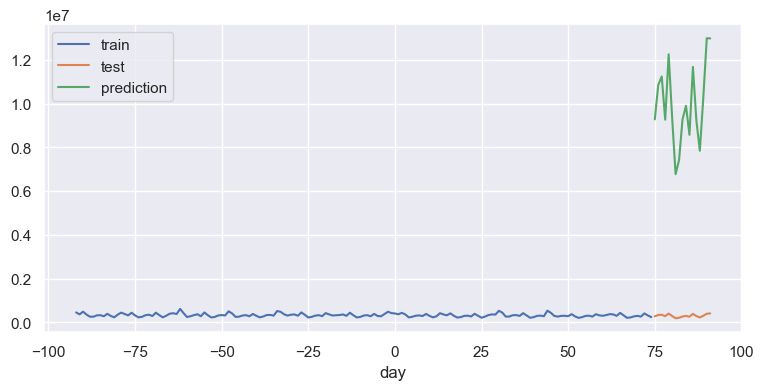

In [110]:
reg = linear_model.Ridge(alpha=0.0001, copy_X= True, fit_intercept=True, max_iter=100000, normalize='deprecated',positive=False, random_state=n,solver= 'auto', tol= 0.001)
#alpha=0.0001, max_iter=100000, solver='auto')
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_pred[:5], y_test[:5])
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()

In [111]:
forecaster = ForecasterAutoreg(
                regressor = reg,
                lags = 5
             )

forecaster.fit(y=df_test['Venta']) # Nedd a data Series
df_forc = forecaster.predict(steps=15)

NameError: name 'ForecasterAutoreg' is not defined

In [112]:
import datetime

id_fec_diaria = []
for i in range(df_forc.shape[0]):
    id_fec_diaria.append(df['id_fec_diaria'].max() + datetime.timedelta(days=i+1))
df_forc.index = id_fec_diaria
df_forc.to_csv('Forecast_Nov15.csv', index=True)

NameError: name 'df_forc' is not defined

## Random Forest Regression

C:\Users\fagui\AppData\Local\Temp\ipykernel_10096\367848043.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train, y_train)
C:\Users\fagui\anaconda3\envs\AI_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


324949.9885539283
174013060016.51224
417148.7264951342


C:\Users\fagui\AppData\Local\Temp\ipykernel_10096\367848043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = y_pred


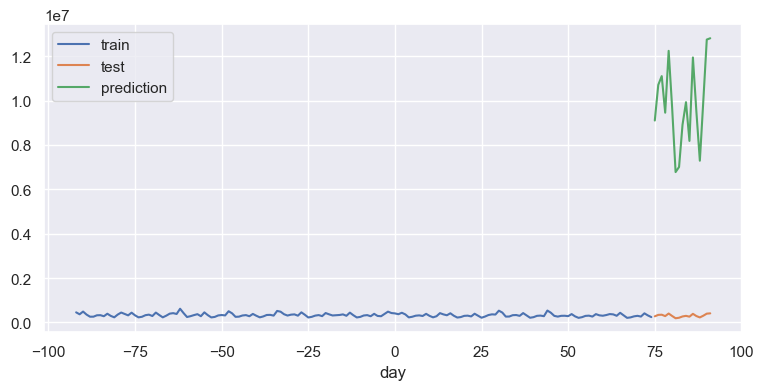

In [113]:
reg = RandomForestRegressor(max_depth=15, random_state=n, n_estimators=70, n_jobs=-1, max_features='auto', criterion='squared_error', ccp_alpha=0.0001)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
y_pred[:5], y_test[:5]
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()

## Bayesian Ridge


367896.05642206897
170063193910.4867
412387.1893142253


C:\Users\fagui\anaconda3\envs\AI_env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fagui\AppData\Local\Temp\ipykernel_10096\1366881767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = y_pred


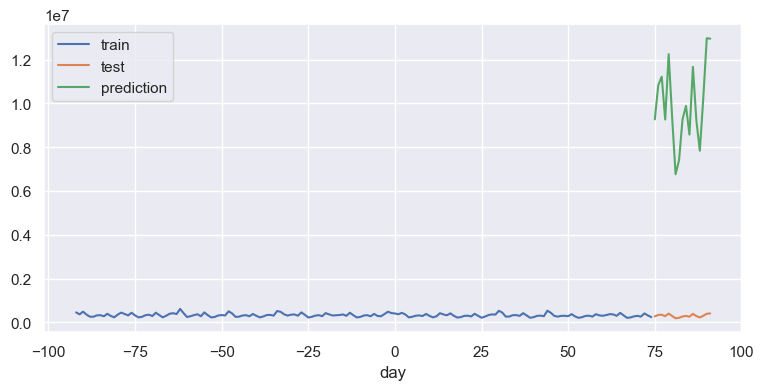

In [114]:
reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()